In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("/content/drive/My Drive/NLP/housing.csv")
dataset = dataset.dropna()
print("Here are the first 10 rows of the dataset :)")
dataset.head(10)

Here are the first 10 rows of the dataset :)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


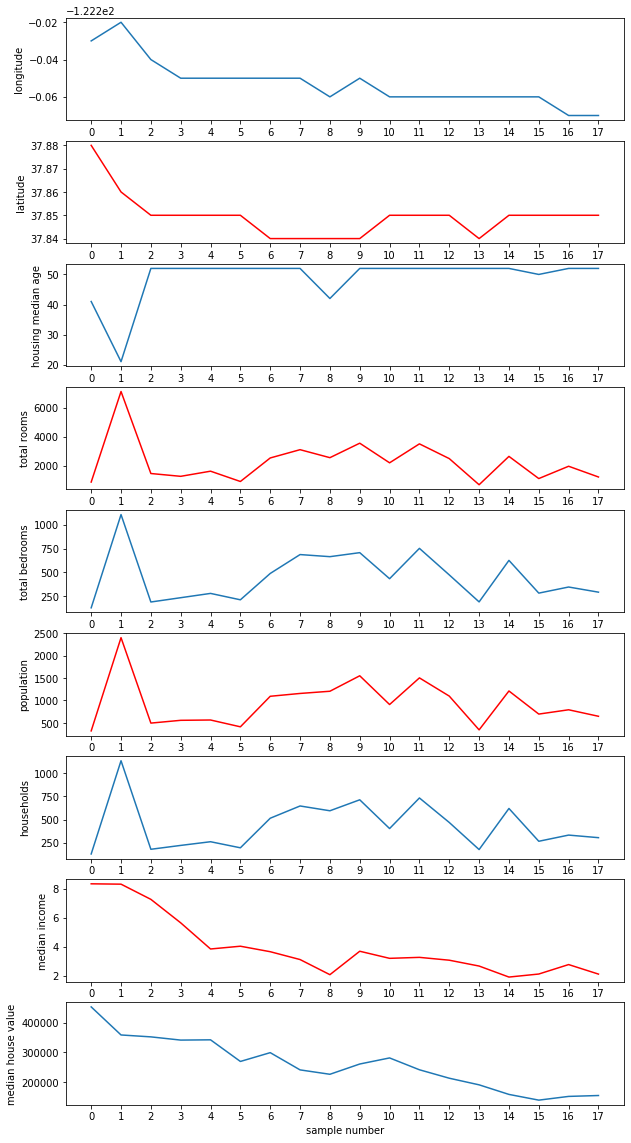

In [3]:
longitude = dataset['longitude']
latitude = dataset["latitude"]
housing_median_age = dataset["housing_median_age"]
total_rooms = dataset["total_rooms"]
total_bedrooms = dataset["total_bedrooms"]
population = dataset["population"]
households = dataset["households"]
median_income = dataset["median_income"]
median_house_value = dataset["median_house_value"]

fig, ax = plt.subplots(9, 1, figsize=(10, 20))
for i in range(9):
  ax[i].xaxis.set_ticks(np.arange(0, 18, 1))
ax[0].plot(longitude[0:18])
ax[0].set_ylabel("longitude")
ax[1].plot(latitude[0:18], color="red")
ax[1].set_ylabel("latitude")
ax[2].plot(housing_median_age[0:18])
ax[2].set_ylabel("housing median age")
ax[3].plot(total_rooms[0:18], color="red")
ax[3].set_ylabel("total rooms")
ax[4].plot(total_bedrooms[0:18])
ax[4].set_ylabel("total bedrooms")
ax[5].plot(population[0:18], color="red")
ax[5].set_ylabel("population")
ax[6].plot(households[0:18])
ax[6].set_ylabel("households")
ax[7].plot(median_income[0:18], color="red")
ax[7].set_ylabel("median income")
ax[8].plot(median_house_value[0:18])
ax[8].set_xlabel("sample number")
ax[8].set_ylabel("median house value")
plt.show()

In [0]:
X = dataset.loc[:, "longitude": "median_income"]
Y = dataset["median_house_value"]

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

x_train_np = x_train.to_numpy()
x_test_np = x_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

In [0]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# min_latitude = x_train["latitude"].min()
# min_longitude = x_train["longitude"].min()
# x_train["latitude"] = x_train["latitude"] + abs(min_latitude)
# x_train["longitude"] = x_train["longitude"] + abs(min_longitude)

# #apply SelectKBest class to extract top 8 best features
# bestfeatures = SelectKBest(score_func=chi2, k=8)
# fit = bestfeatures.fit(x_train,y_train)
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(x_train.columns)
# #concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Specs','Score']  #naming the dataframe columns

# print(featureScores.nlargest(5,'Score'))  #print 5 best features

In [0]:
# # feature selection
# # delete unimportant features

# del x_train["latitude"]
# del x_train["longitude"]
# del x_train["median_income"]
# del x_train["housing_median_age"]

# del x_test["latitude"]
# del x_test["longitude"]
# del x_test["median_income"]
# del x_test["housing_median_age"]

In [8]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

mse = mean_squared_error(y_test, predictions)
print("Model's MSE is: " + str(mse))

r2 = r2_score(y_test, predictions)
print("Model's R^2 is: " + str(r2))

Model's MSE is: 4789517468.728229
Model's R^2 is: 0.6398315563433199


In [0]:
import torch
from torch.nn import Conv1d
from torch.nn import MaxPool1d
from torch.nn import Flatten
from torch.nn import Linear
from torch.nn.functional import relu
from torch.utils.data import DataLoader, TensorDataset

In [0]:
class CnnRegressor(torch.nn.Module):
  def __init__(self, batch_size, inputs, outputs):
    super(CnnRegressor, self).__init__()
    self.batch_size = batch_size
    self.inputs = inputs
    self.outputs = outputs

    self.input_layer = Conv1d(inputs, batch_size, 1)
    self.max_pooling_layer = MaxPool1d(1)
    self.conv_layer = Conv1d(batch_size, 256, kernel_size=4, stride=2, padding=2)
    self.flatten_layer = Flatten()
    self.linear_layer = Linear(256, 64)
    self.output_layer = Linear(64, outputs)

  def feed(self, input):
    input = input.reshape((self.batch_size, self.inputs, 1))
    output = relu(self.input_layer(input))
    output = self.max_pooling_layer(output)
    output = relu(self.conv_layer(output))
    output = self.flatten_layer(output)
    output = self.linear_layer(output)
    output = self.output_layer(output)
    return output

In [11]:
from torch.optim import SGD
from torch.nn import L1Loss

!pip install pytorch-ignite
from ignite.contrib.metrics.regression.r2_score import R2Score

In [12]:
batch_size = 256
model = CnnRegressor(batch_size, X.shape[1], 1)
model.cuda()

CnnRegressor(
  (input_layer): Conv1d(8, 256, kernel_size=(1,), stride=(1,))
  (max_pooling_layer): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer): Conv1d(256, 256, kernel_size=(4,), stride=(2,), padding=(2,))
  (flatten_layer): Flatten()
  (linear_layer): Linear(in_features=256, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
)

In [0]:
def model_loss(model, dataset, train=False, optimizer=None):
  performance = L1Loss()
  score_metric = R2Score()

  avg_loss = 0
  avg_score = 0
  count = 0
  for input, output in iter(dataset):
    predictions = model.feed(input)
    loss = performance(predictions, output)
    score_metric.update([predictions, output])
    score = score_metric.compute()
    if(train):
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      
    avg_loss += loss.item()
    avg_score += score
    count += 1

    return avg_loss / count, avg_score / count

In [14]:
epochs = 10000
lr = 1e-5
optimizer = SGD(model.parameters(), lr=lr)
inputs = torch.from_numpy(x_train_np).cuda().float()
outputs = torch.from_numpy(y_train_np.reshape(y_train_np.shape[0], 1)).cuda().float()
tensor = TensorDataset(inputs, outputs)
loader = DataLoader(tensor, batch_size, shuffle=True, drop_last=True)

losses = []
r2_scores = []
for cnt, epoch in enumerate(range(epochs)):
  avg_loss, avg_r2_score = model_loss(model, loader, train=True, optimizer=optimizer)
  losses.append(avg_loss)
  r2_scores.append(avg_r2_score)
  if(cnt % 2000 == 1):
    lr /= 2
  if(cnt % 100 == 1):
    print("Epoch " + str(epoch + 1) + ":\n\tLoss = " + str(avg_loss) + "\n\tR^2 Score = " + str(avg_r2_score))

Epoch 2:
	Loss = 195267.0
	R^2 Score = -2.9849163826690512
Epoch 102:
	Loss = 117310.8046875
	R^2 Score = -1.1615682477558877
Epoch 202:
	Loss = 107484.421875
	R^2 Score = -0.6633977042433623
Epoch 302:
	Loss = 117382.09375
	R^2 Score = -1.7964879007275982
Epoch 402:
	Loss = 113970.4296875
	R^2 Score = -0.9476751837055775
Epoch 502:
	Loss = 108735.265625
	R^2 Score = -0.6030837898857215
Epoch 602:
	Loss = 103268.4375
	R^2 Score = -0.453607598773494
Epoch 702:
	Loss = 101375.453125
	R^2 Score = -0.6143659731524718
Epoch 802:
	Loss = 99107.0
	R^2 Score = -0.3705202705927635
Epoch 902:
	Loss = 96819.7734375
	R^2 Score = -0.45292768816224926
Epoch 1002:
	Loss = 99168.3125
	R^2 Score = -0.4528530940916473
Epoch 1102:
	Loss = 85704.0625
	R^2 Score = -0.10355910948161551
Epoch 1202:
	Loss = 100143.0390625
	R^2 Score = -0.36553210274349013
Epoch 1302:
	Loss = 113572.75
	R^2 Score = -0.9175577193095008
Epoch 1402:
	Loss = 95676.8203125
	R^2 Score = -0.32659917875248135
Epoch 1502:
	Loss = 10920

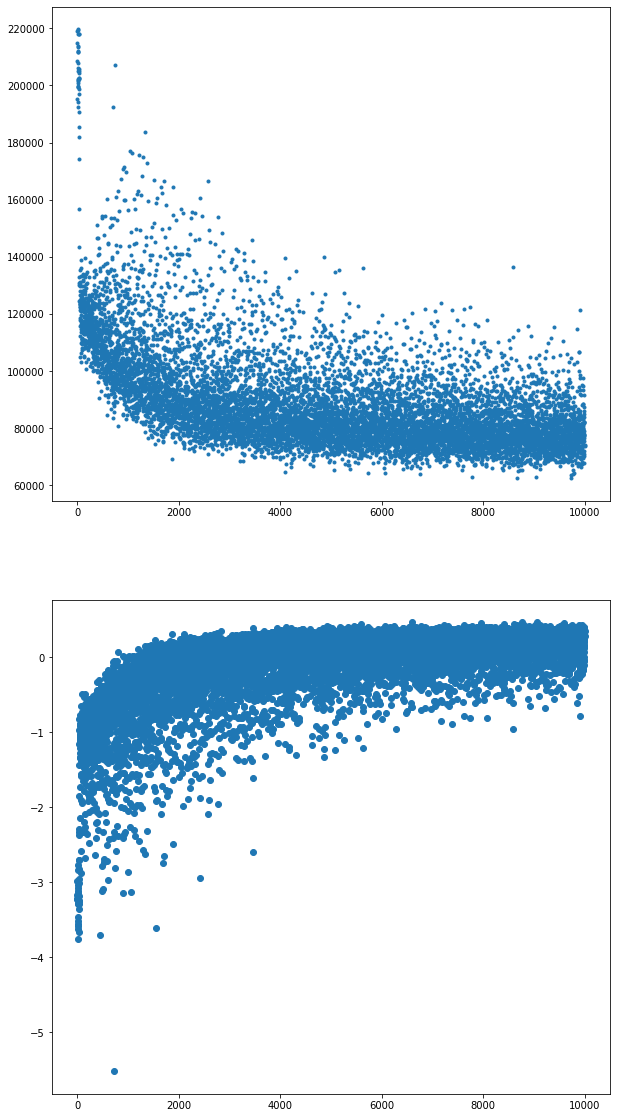

In [15]:
fig, ax = plt.subplots(2, 1, figsize=(10, 20))
ax[0].plot(losses, ".")
ax[1].plot(r2_scores, "o")

In [16]:
inputs = torch.from_numpy(x_test_np).cuda().float()
outputs = torch.from_numpy(y_test_np.reshape(y_test_np.shape[0], 1)).cuda().float()

tensor = TensorDataset(inputs, outputs)
loader = DataLoader(tensor, batch_size, shuffle=True, drop_last=True)
avg_loss, avg_r2_score = model_loss(model, loader)
print("The model's L1 loss is: " + str(avg_loss))
print("The model's R^2 score is: " + str(avg_r2_score))

The model's L1 loss is: 67314.890625
The model's R^2 score is: 0.4086396320663652
